We are going to build a model that predicts if someone who seeks a loan might be a defaulter or a non-defaulter. We have several independent variables like, checking account balance, credit history, purpose, loan amount etc. For more details on the dataset, please see source at https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [2]:
CreditsData=pd.read_excel('D:/Ment Class/Practise11/Excel Data/CreditsData.xlsx')

In [3]:
CreditsData.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [4]:
CreditsData.shape

(1000, 17)

In [6]:
CreditsData.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [7]:
CreditsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [8]:
for feature in CreditsData.columns: # Loop through all columns in the dataframe
    if CreditsData[feature].dtype == 'object': # Only apply for columns with categorical strings
        CreditsData[feature] = pd.Categorical(CreditsData[feature])# Replace strings with an integer
CreditsData.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [9]:
print(CreditsData.checking_balance.value_counts())
print(CreditsData.credit_history.value_counts())
print(CreditsData.purpose.value_counts())
print(CreditsData.savings_balance.value_counts())
print(CreditsData.employment_duration.value_counts())
print(CreditsData.other_credit.value_counts())
print(CreditsData.housing.value_counts())
print(CreditsData.job.value_counts())
print(CreditsData.phone.value_counts())


checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: count, dtype: int64
credit_history
good         530
critical     293
poor          88
very good     49
perfect       40
Name: count, dtype: int64
purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: count, dtype: int64
savings_balance
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: count, dtype: int64
employment_duration
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: count, dtype: int64
other_credit
none     814
bank     139
store     47
Name: count, dtype: int64
housing
own      713
rent     179
other    108
Name: count, dtype: int64
job
skilled       630
unskilled     200
management    148
unemployed     22
Name: count, dtype: int64
phone
no     596

In [10]:
replaceStruct = {
                "checking_balance":     {"< 0 DM": 1, "1 - 200 DM": 2 ,"> 200 DM": 3 ,"unknown":-1},
                "credit_history": {"critical": 1, "poor":2 , "good": 3, "very good": 4,"perfect": 5},
                 "savings_balance": {"< 100 DM": 1, "100 - 500 DM":2 , "500 - 1000 DM": 3, "> 1000 DM": 4,"unknown": -1},
                 "employment_duration":     {"unemployed": 1, "< 1 year": 2 ,"1 - 4 years": 3 ,"4 - 7 years": 4 ,"> 7 years": 5},
                "phone":     {"no": 1, "yes": 2 },
                #"job":     {"unemployed": 1, "unskilled": 2, "skilled": 3, "management": 4 },
                "default":     {"no": 0, "yes": 1 } 
                    }
oneHotCols=["purpose","housing","other_credit","job"]


In [11]:
CreditsData=CreditsData.replace(replaceStruct)
CreditsData=pd.get_dummies(CreditsData, columns=oneHotCols)
CreditsData.head(10)


,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,False,True,False,False,True,False,False,True,False,False
1,2,48,3,5951,1,3,2,2,22,1,...,False,True,False,False,True,False,False,True,False,False
2,-1,12,1,2096,1,4,2,3,49,1,...,False,True,False,False,True,False,False,False,False,True
3,1,42,3,7882,1,4,2,4,45,1,...,True,False,False,False,True,False,False,True,False,False
4,1,24,2,4870,1,3,3,4,53,2,...,True,False,False,False,True,False,False,True,False,False
5,-1,36,3,9055,-1,3,2,4,35,1,...,True,False,False,False,True,False,False,False,False,True
6,-1,24,3,2835,3,5,3,4,53,1,...,False,True,False,False,True,False,False,True,False,False
7,2,36,3,6948,1,3,2,2,35,1,...,False,False,True,False,True,False,True,False,False,False
8,-1,12,3,3059,4,4,2,4,61,1,...,False,True,False,False,True,False,False,False,False,True
9,2,30,1,5234,1,1,4,2,28,2,...,False,True,False,False,True,False,True,False,False,False


In [12]:
CreditsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   checking_balance              1000 non-null   category
 1   months_loan_duration          1000 non-null   int64   
 2   credit_history                1000 non-null   category
 3   amount                        1000 non-null   int64   
 4   savings_balance               1000 non-null   category
 5   employment_duration           1000 non-null   category
 6   percent_of_income             1000 non-null   int64   
 7   years_at_residence            1000 non-null   int64   
 8   age                           1000 non-null   int64   
 9   existing_loans_count          1000 non-null   int64   
 10  dependents                    1000 non-null   int64   
 11  phone                         1000 non-null   category
 12  default                       1000 non-null   cat

In [13]:
X = CreditsData.drop("default" , axis=1)
y = CreditsData.pop("default")

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [15]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [16]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))



1.0
0.6933333333333334


In [22]:
from sklearn.tree import export_graphviz
import pandas as pd  # Assuming X_train is a pandas DataFrame

# Assuming dTree is already trained and X_train is defined
train_char_label = ['No', 'Yes']

# Open file to write the DOT data
Credit_Tree_File = open('credit_tree.dot', 'w')

# Export the decision tree to a DOT file
dot_data = export_graphviz(dTree, out_file=Credit_Tree_File, feature_names=list(X_train.columns), class_names=train_char_label)

# Close the file after writing
Credit_Tree_File.close()

In [24]:
from IPython.display import Image, display
from os import system

retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if retCode > 0:
    print("system command returning error: " + str(retCode))
else:
    display(Image("credit_tree.png"))

system command returning error: 1


In [25]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.7528571428571429
0.7433333333333333


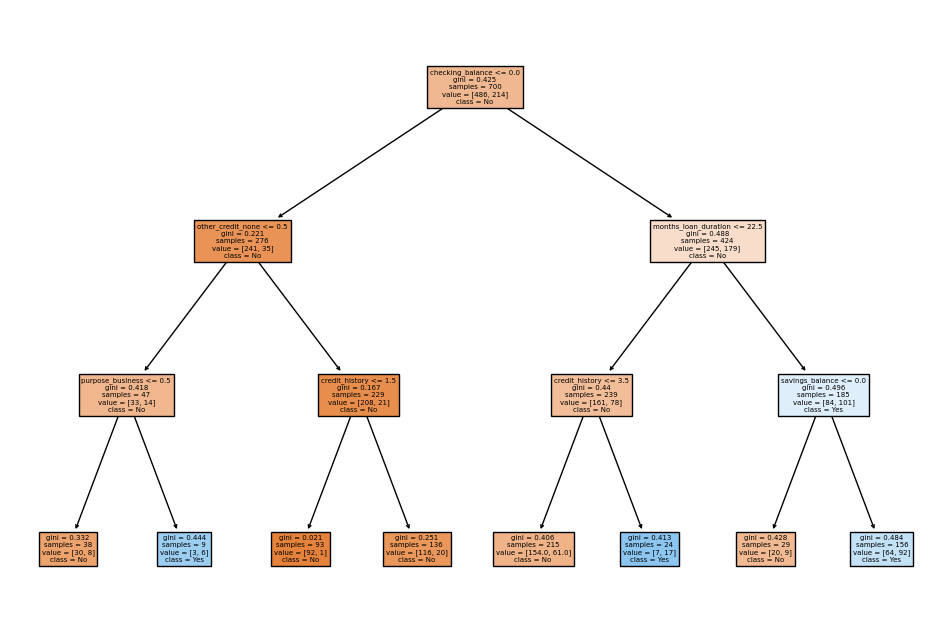

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming dTreeR is already trained and X_train is defined
train_char_label = ['No', 'Yes']

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dTreeR, filled=True, feature_names=list(X_train.columns), class_names=train_char_label)
plt.savefig('credit_treeR.png')  # Save the plot as an image
plt.show()

In [27]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                   Imp
checking_balance              0.492510
months_loan_duration          0.169806
credit_history                0.166109
amount                        0.000000
savings_balance               0.064467
employment_duration           0.000000
percent_of_income             0.000000
years_at_residence            0.000000
age                           0.000000
existing_loans_count          0.000000
dependents                    0.000000
phone                         0.000000
purpose_business              0.051129
purpose_car                   0.000000
purpose_car0                  0.000000
purpose_education             0.000000
purpose_furniture/appliances  0.000000
purpose_renovations           0.000000
housing_other                 0.000000
housing_own                   0.000000
housing_rent                  0.000000
other_credit_bank             0.000000
other_credit_none             0.055977
other_credit_store            0.000000
job_management           

0.7433333333333333


<Axes: >

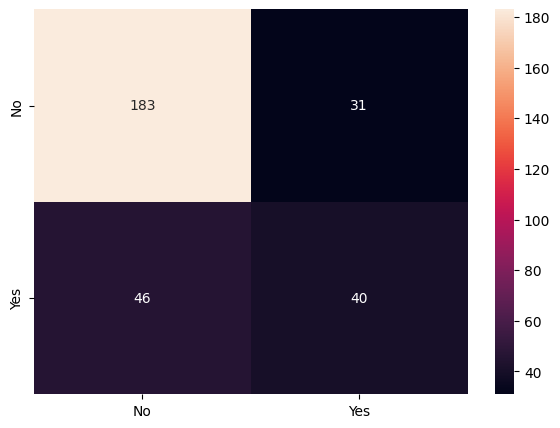

In [28]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [32]:
pip install --upgrade scikit-learn


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Assuming dTree is already trained
# Initialize a new instance of the DecisionTreeClassifier
dTree = DecisionTreeClassifier()  # You may need to provide parameters here if needed

# Create the Bagging classifier
bgcl = BaggingClassifier(dTree, n_estimators=50, random_state=1)

# Fit the Bagging classifier to the training data
bgcl.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=1)

0.7733333333333333


<Axes: >

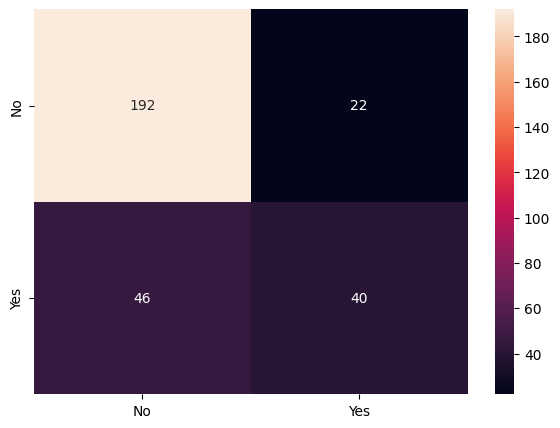

In [36]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



In [38]:
from sklearn.ensemble import AdaBoostClassifier

# Create AdaBoost classifier with 50 estimators
abcl = AdaBoostClassifier(n_estimators=50, random_state=1)

# Fit the classifier to the training data
abcl.fit(X_train, y_train)

D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=1)

0.7366666666666667


<Axes: >

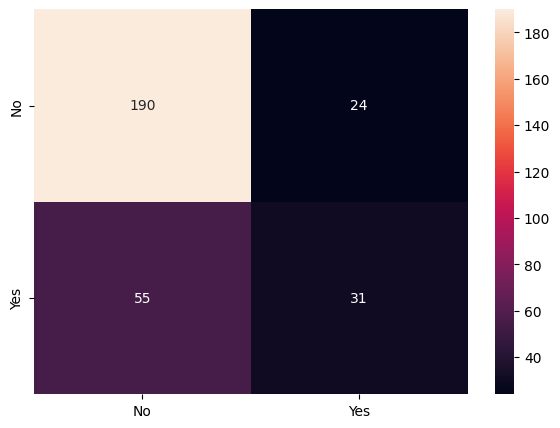

In [39]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)


0.74


<Axes: >

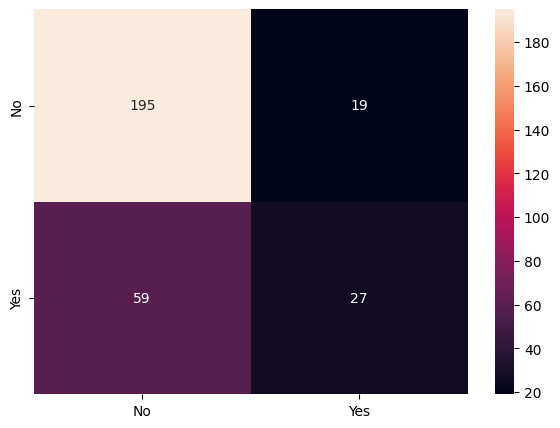

In [41]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)


0.7766666666666666


<Axes: >

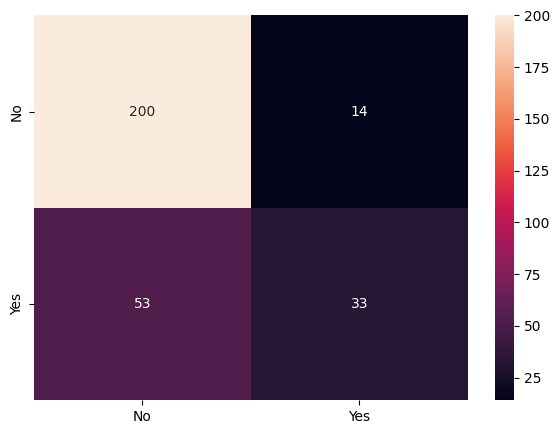

In [43]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')